In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read crime rates
crime_df = pd.read_csv("data/crimeratesbystate-formatted.csv")
crime_df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1


In [4]:
# Read education
education_df = pd.read_csv("data/education.csv")
education_df.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


In [5]:
# Read chocolate rating
chocolate_df = pd.read_excel("data/Chocolate Ratings.xlsx")
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


### Histogram

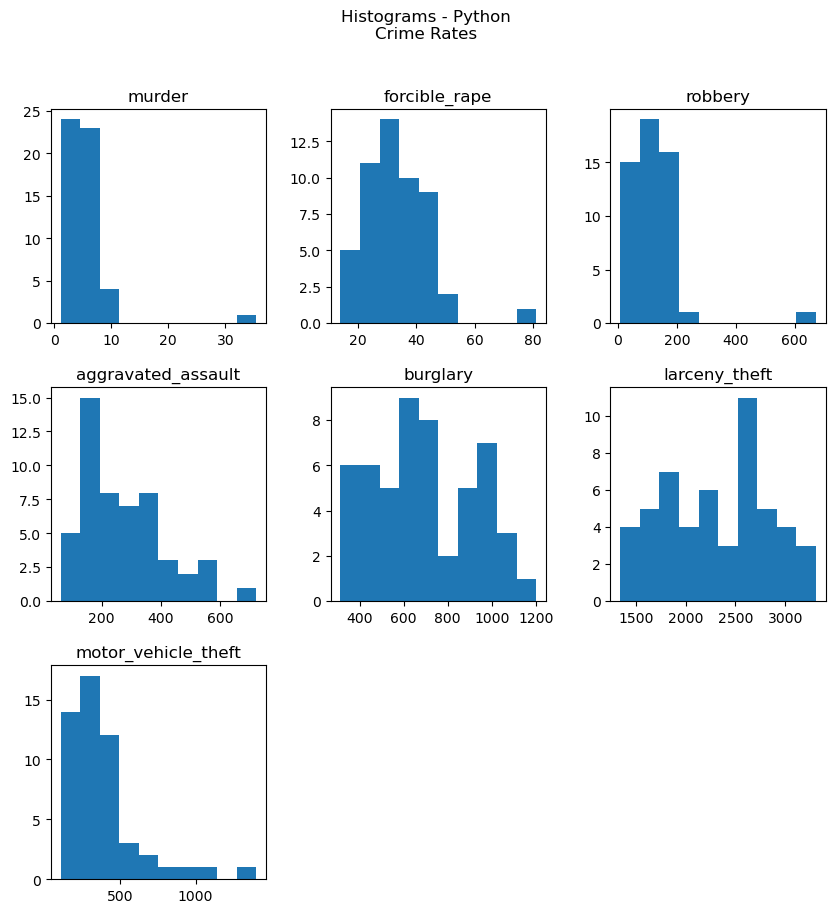

In [6]:
axes = crime_df.hist(bins = 10, figsize = (10,10), grid = False)
plt.suptitle("Histograms - Python\nCrime Rates")

plt.savefig('images/histogram-python.png')

### Box Plot

In [7]:
states_education = education_df[education_df['state'] != 'United States']
states_education.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5


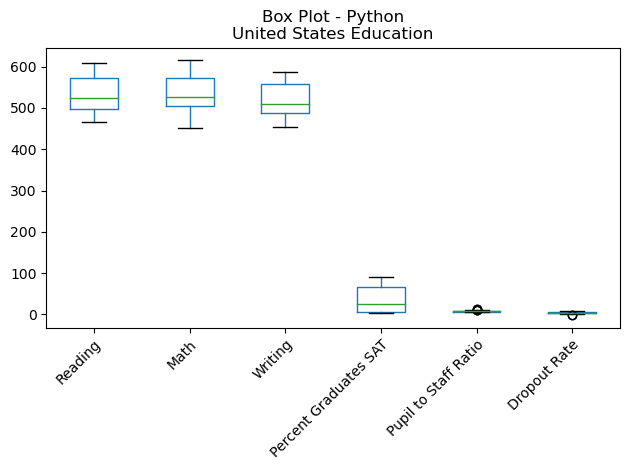

In [8]:
fig = plt.figure()

bp = states_education.boxplot(grid = False)

plt.title("Box Plot - Python\nUnited States Education")
plt.xticks([1, 2, 3, 4, 5, 6], ['Reading', 'Math', 'Writing', 'Percent Graduates SAT', 'Pupil to Staff Ratio', 'Dropout Rate'])
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.tight_layout()

plt.show()

fig.savefig('images/boxplot-python.png')

### Bullet Chart

In [9]:
def bulletgraph(data = None, limits = None, labels = None, axis_label = None, title = None,
                size=(15, 15), palette = None, formatter = None, target_color = "gray",
                bar_color = "black", label_color = "gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("blue", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)
    
    plt.savefig('images/bulletchart-python.png')

In [10]:
data = []
for index, row in education_df.iterrows():
    if index == 0:
        us_score = row['reading']
    else:
        state_score = row['reading']
        data.append((row["state"], state_score, us_score))

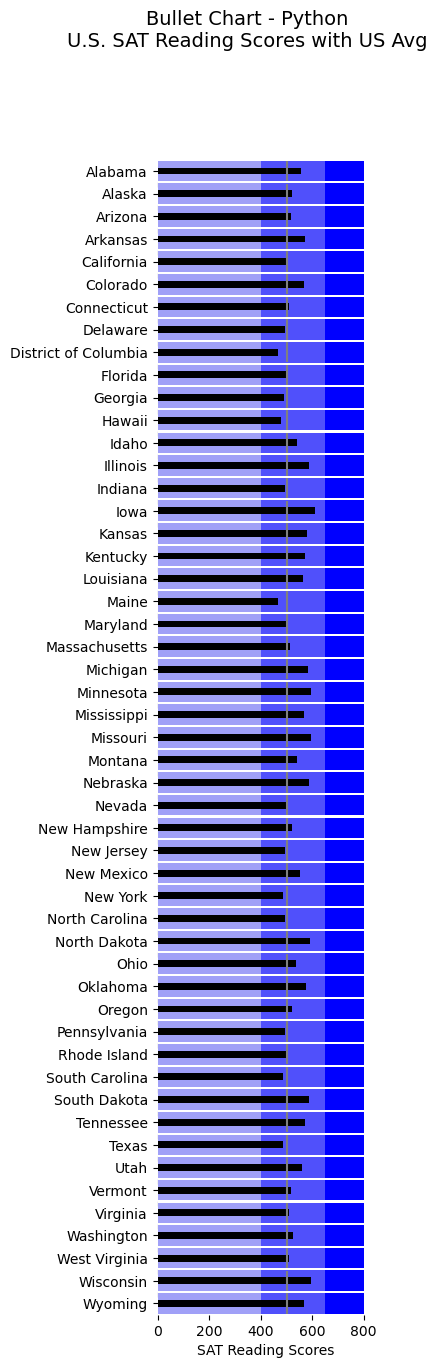

In [11]:
bulletgraph(data,limits = [0, 400, 650, 800],
            axis_label = 'SAT Reading Scores', title = "Bullet Chart - Python\nU.S. SAT Reading Scores with US Avg")

### My choice chart: WordCloud

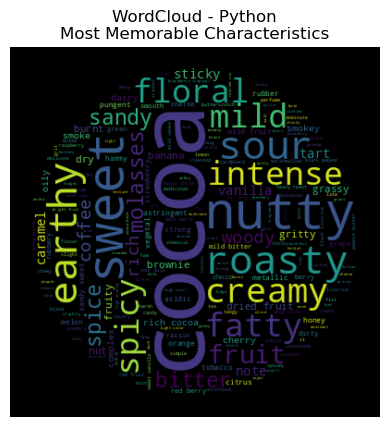

In [12]:
# Most frequent words in the Characteristics
word_string = " ".join(chocolate_df['Most Memorable Characteristics'].str.lower())

# Create a circle mask
x, y = np.ogrid[:400, :400]
mask = (x - 200) ** 2 + (y - 200) ** 2 > 180 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color = "black", repeat = True, mask = mask)
wc.generate(word_string)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.title('WordCloud - Python\nMost Memorable Characteristics')

plt.savefig('images/wordcloud-python.png')